In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
data = pd.read_csv('./data.csv', low_memory=False, sep=';')
data.sample(2)

,CompanyName,Location,Datum,Price,Rocket,StatusRocket,StatusMission
4522,RVSN USSR,"Site 81/24, Baikonur Cosmodrome, Kazakhstan","Tue May 22, 1979 23:00 UTC",NaN,Cosmos 1100 & 1101,Retired,Success
5659,CASC,"Site 5020 (LA-2A), Jiuquan Satellite Launch Ce...","Fri Apr 24, 1970 13:35 UTC",NaN,Dong Fang Hong 1,Retired,Success


---

## Prepering data
- Setting years of space race
- Limiting data only to USA and Russia
- Excluding some columns
- Optimizing memory usage 

In [3]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6750 entries, 0 to 6749
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CompanyName    6750 non-null   object
 1   Location       6750 non-null   object
 2   Datum          6710 non-null   object
 3   Price          2700 non-null   object
 4   Rocket         6750 non-null   object
 5   StatusRocket   6750 non-null   object
 6   StatusMission  6750 non-null   object
dtypes: object(7)
memory usage: 3.2 MB


In [4]:
data['Datum']= pd.to_datetime(data['Datum'], format="%a %b %d, %Y %H:%M %Z")

In [5]:
data.head()

,CompanyName,Location,Datum,Price,Rocket,StatusRocket,StatusMission
0,CASC,"LC-3, Xichang Satellite Launch Center, China",2024-04-20 23:45:00+00:00,$29.75 million,Yaogan 42-02,Active,Success
1,SpaceX,"SLC-40, Cape Canaveral SFS, Florida, USA",2024-04-18 22:40:00+00:00,$67.0 million,Starlink Group 6-52,Active,Success
2,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2024-04-17 21:26:00+00:00,$67.0 million,Starlink Group 6-51,Active,Success
3,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2024-04-15 04:12:00+00:00,$29.75 million,SuperView Neo 3-01,Active,Success
4,SpaceX,"SLC-40, Cape Canaveral SFS, Florida, USA",2024-04-13 01:40:00+00:00,$67.0 million,Starlink Group 6-49,Active,Success


In [6]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6750 entries, 0 to 6749
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   CompanyName    6750 non-null   object             
 1   Location       6750 non-null   object             
 2   Datum          6710 non-null   datetime64[ns, UTC]
 3   Price          2700 non-null   object             
 4   Rocket         6750 non-null   object             
 5   StatusRocket   6750 non-null   object             
 6   StatusMission  6750 non-null   object             
dtypes: datetime64[ns, UTC](1), object(6)
memory usage: 2.7 MB


In [7]:
data['CompanyName'].value_counts().head()

CompanyName
RVSN USSR       2472
US Air Force     549
CASC             532
Roscosmos        368
SpaceX           348
Name: count, dtype: int64

In [8]:
data['CompanyName'] = data['CompanyName'].astype('category')

In [9]:
data['StatusRocket'] = data['StatusRocket'].astype('category')

In [10]:
data['StatusMission'] = data['StatusMission'].astype('category')

In [11]:
data['Price'] = data.Price.str.replace('$', '').str.replace(' million', '').str.replace(',', '')

In [12]:
data.Price = data.Price.astype('float')

In [13]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6750 entries, 0 to 6749
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   CompanyName    6750 non-null   category           
 1   Location       6750 non-null   object             
 2   Datum          6710 non-null   datetime64[ns, UTC]
 3   Price          2700 non-null   float64            
 4   Rocket         6750 non-null   object             
 5   StatusRocket   6750 non-null   category           
 6   StatusMission  6750 non-null   category           
dtypes: category(3), datetime64[ns, UTC](1), float64(1), object(2)
memory usage: 1.2 MB


In [14]:
data.head()

,CompanyName,Location,Datum,Price,Rocket,StatusRocket,StatusMission
0,CASC,"LC-3, Xichang Satellite Launch Center, China",2024-04-20 23:45:00+00:00,29.75,Yaogan 42-02,Active,Success
1,SpaceX,"SLC-40, Cape Canaveral SFS, Florida, USA",2024-04-18 22:40:00+00:00,67.00,Starlink Group 6-52,Active,Success
2,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2024-04-17 21:26:00+00:00,67.00,Starlink Group 6-51,Active,Success
3,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2024-04-15 04:12:00+00:00,29.75,SuperView Neo 3-01,Active,Success
4,SpaceX,"SLC-40, Cape Canaveral SFS, Florida, USA",2024-04-13 01:40:00+00:00,67.00,Starlink Group 6-49,Active,Success


In [15]:
# selecting entries from 1955–1975 (when space race took place)
time_of_race = data[(data['Datum'].dt.year >= 1955) & (data['Datum'].dt.year <= 1975)]

In [16]:
USA_filter = time_of_race['Location'].str.contains('USA')

In [17]:
Russia_filter = time_of_race['Location'].str.contains('Russia')

In [18]:
# filtering location to separate only these from USA and Russia
space_race = time_of_race[Russia_filter | USA_filter].copy()

In [19]:
def set_country(data):
    if 'USA' in data:
        return 'USA'
    elif 'Russia' in data:
        return 'Russia'
    else:
        return np.NaN

In [20]:
space_race['Country'] = space_race.loc[:, ('Location')].apply(set_country)

In [21]:
space_race.head()

,CompanyName,Location,Datum,Price,Rocket,StatusRocket,StatusMission,Country
4956,RVSN USSR,"Site 43/3, Plesetsk Cosmodrome, Russia",1975-12-27 10:22:00+00:00,NaN,Molniya-3 n°56,Retired,Success,Russia
4957,RVSN USSR,"Site 41/1, Plesetsk Cosmodrome, Russia",1975-12-25 19:00:00+00:00,NaN,Meteor n°33,Retired,Success,Russia
4960,RVSN USSR,"Site 132/1, Plesetsk Cosmodrome, Russia",1975-12-19 14:00:00+00:00,NaN,DS-P1 satellite,Retired,Failure,Russia
4961,RVSN USSR,"Site 43/3, Plesetsk Cosmodrome, Russia",1975-12-17 11:06:00+00:00,NaN,Molniya-2 n°55,Retired,Success,Russia
4964,Martin Marietta,"SLC-40, Cape Canaveral SFS, Florida, USA",1975-12-14 05:15:00+00:00,NaN,DSP-5,Retired,Success,USA


---

## How many missions each country started?
##  How many missions were successful, and how many failed?

In [22]:
success_and_fail = space_race.groupby(['Country', 'StatusMission'], observed=False).size().unstack(fill_value=0)

In [23]:
success_and_fail

StatusMission,Failure,Partial Failure,Prelaunch Failure,Success
Country,,,,
Russia,43,9,0,490
USA,101,25,0,623


<Axes: xlabel='Country'>

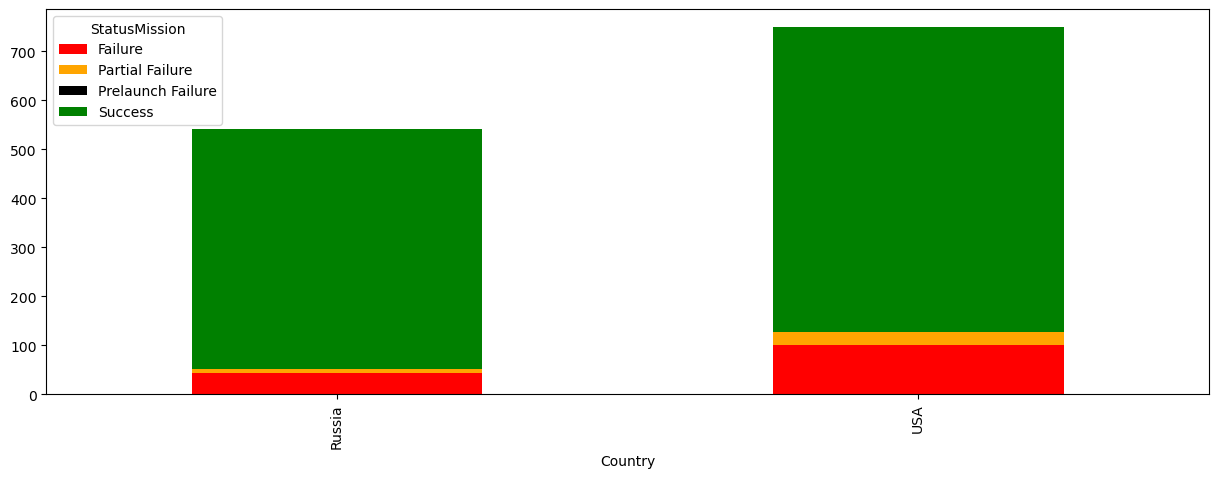

In [24]:
success_and_fail.plot(kind='bar', stacked=True, figsize=(15,5), color={'Success': 'green', "Failure": 'red', 'Partial Failure': 'orange', 'Prelaunch Failure': 'black'})

---

## When these mission happened?

<Axes: xlabel='Datum', ylabel='Country'>

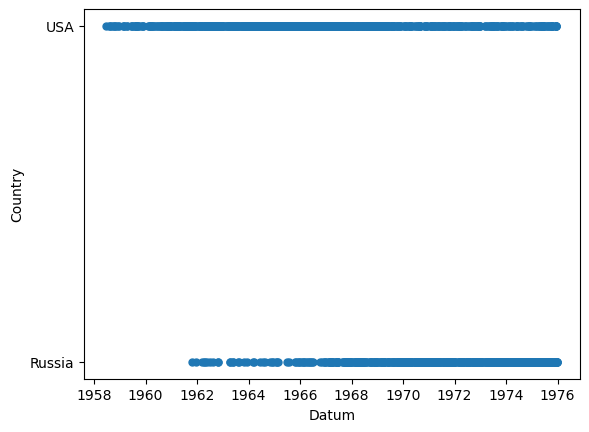

In [25]:
space_race.plot.scatter(x='Datum', y='Country', s=25)

In [26]:
space_race['Year'] = space_race.Datum.dt.year

In [27]:
missions_USA = space_race.query('Country == "USA"').Year.value_counts()

In [28]:
missions_Russia = space_race.query('Country == "Russia"').Year.value_counts()

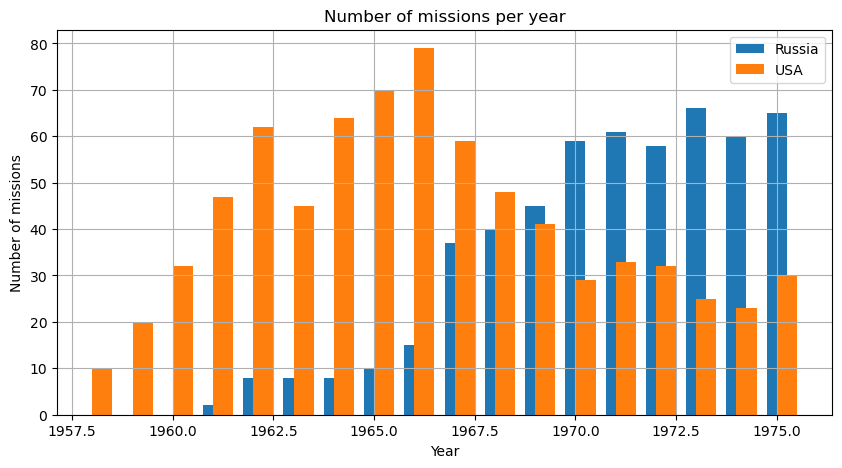

In [29]:
plt.figure(figsize=(10, 5))  # Set the size of the plot

# Plot each series
plt.bar(missions_Russia.index, missions_Russia.values, label='Russia', width=.5)  # You can customize the line style
plt.bar(missions_USA.index, missions_USA.values, label='USA', align='edge', width=.5)  # Adding another series

# Add title and labels
plt.title('Number of missions per year')
plt.xlabel('Year')
plt.ylabel('Number of missions')

# Adding a legend
plt.legend()

# Show the plot
plt.grid(True)  # Optionally add a grid
plt.show()

---

### Observations on Mission Continuity
- **Consistent U.S. Missions:** From what we can see, the U.S. didn’t really take breaks with their space missions.Showing they were really dedicated to keeping their space program active.
- **Gaps in Russian Missions:** Russia, however, had a few gaps in their mission timeline. Maybe they were rethinking their strategies or dealing with resource issues? It shows they weren’t as steady with their launches.

### Mission Frequency Changes Post-1967
- **U.S. Slows Downround** After 1967, there’s a noticeable dip in how often the U.S. was launching missions. It seems like they might have slowed down after achieving some of their big goals, maybe taking time to plan out their next steps.
- **Russia Steps It Up:** At the same time, Russia started launching more missions. Perhaps they were trying to catch up or get ahead, especially if they felt they were falling behind in the space race.

### It’s pretty interesting to see how both countries adjusted their space programs over time, likely influenced by their successes, setbacks, and the overall space race dynamics.


---


## When most failures happened? At the begining or at the end?

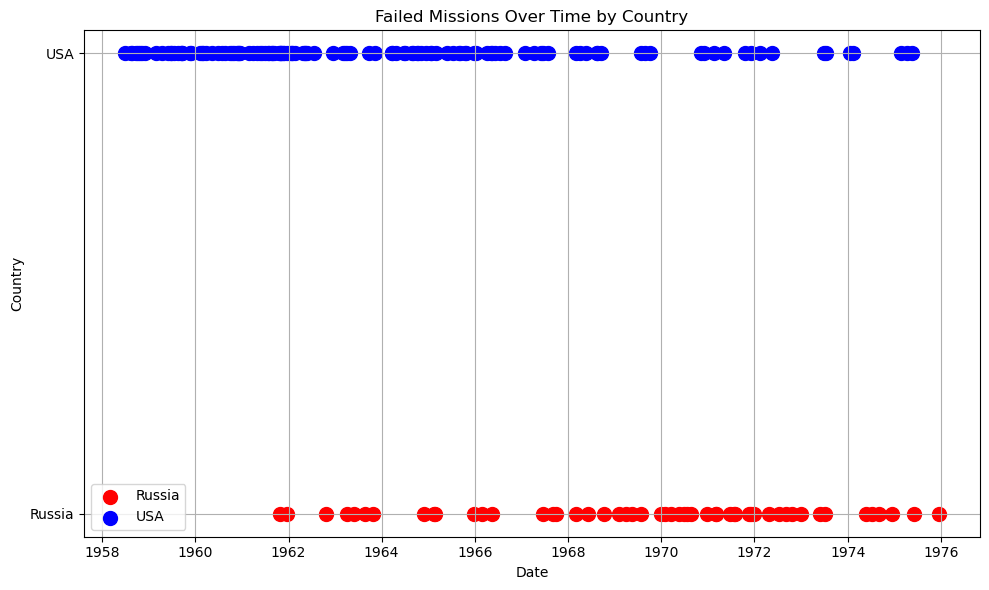

In [30]:
failed_missions = space_race[space_race['StatusMission'] != 'Success']

country_colors = {'USA': 'blue', 'Russia': 'red'}

# Plotting the failed missions
plt.figure(figsize=(10, 6))
for country, group in failed_missions.groupby('Country'):
    plt.scatter(group['Datum'], [country] * len(group), color=country_colors[country], label=country, marker='o', s=100)

plt.title('Failed Missions Over Time by Country')
plt.xlabel('Date')
plt.ylabel('Country')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<Axes: title={'center': 'USA Failures'}, xlabel='Year'>

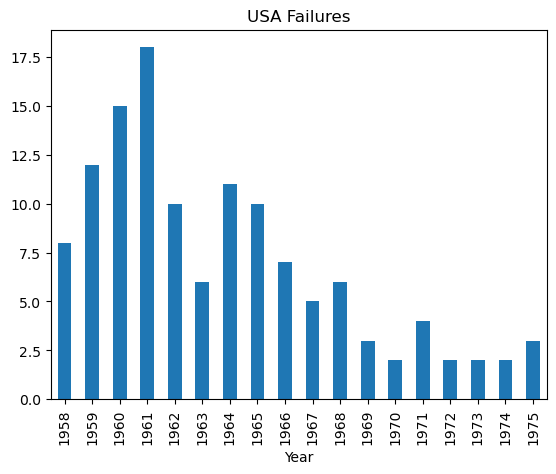

In [31]:
filterUSA = space_race['Country'] == 'USA'
space_race[filterUSA].query('StatusMission != "Success"').groupby(['Year'], observed=False)['StatusMission'].count().plot(kind='bar', title='USA Failures')

<Axes: title={'center': 'Russia Failures'}, xlabel='Year'>

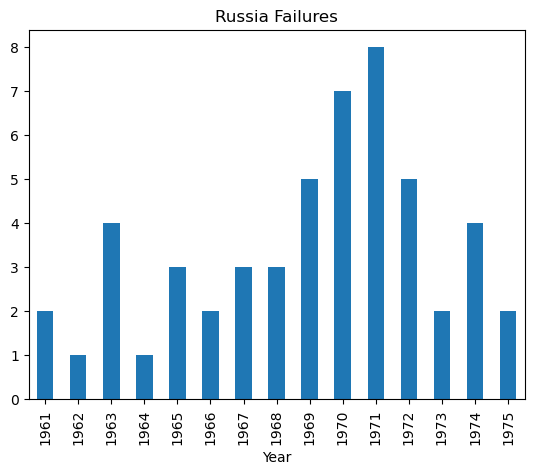

In [32]:
filterRussia = space_race['Country'] == 'Russia'
space_race[filterRussia].query('StatusMission != "Success"').groupby(['Year'], observed=False)['StatusMission'].count().plot(kind='bar', title='Russia Failures')

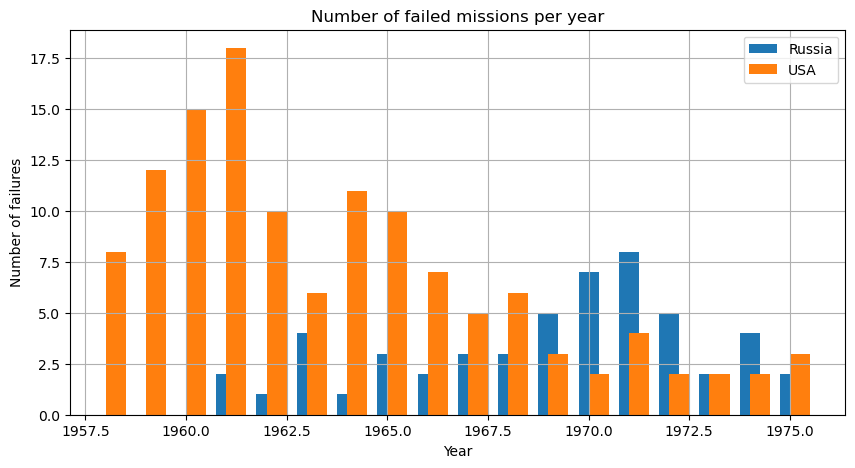

In [33]:
plt.figure(figsize=(10, 5))  # Set the size of the plot
russia = space_race[filterRussia].query('StatusMission != "Success"').groupby(['Year'], observed=False)['StatusMission'].count()
usa = space_race[filterUSA].query('StatusMission != "Success"').groupby(['Year'], observed=False)['StatusMission'].count()
# Plot each series
plt.bar(russia.index, russia.values, label='Russia', width=.5)  # You can customize the line style
plt.bar(usa.index, usa.values, label='USA', align='edge', width=.5)  # Adding another series

# Add title and labels
plt.title('Number of failed missions per year')
plt.xlabel('Year')
plt.ylabel('Number of failures')

# Adding a legend
plt.legend()

# Show the plot
plt.grid(True)  # Optionally add a grid
plt.show()

---

## What about successful missions?

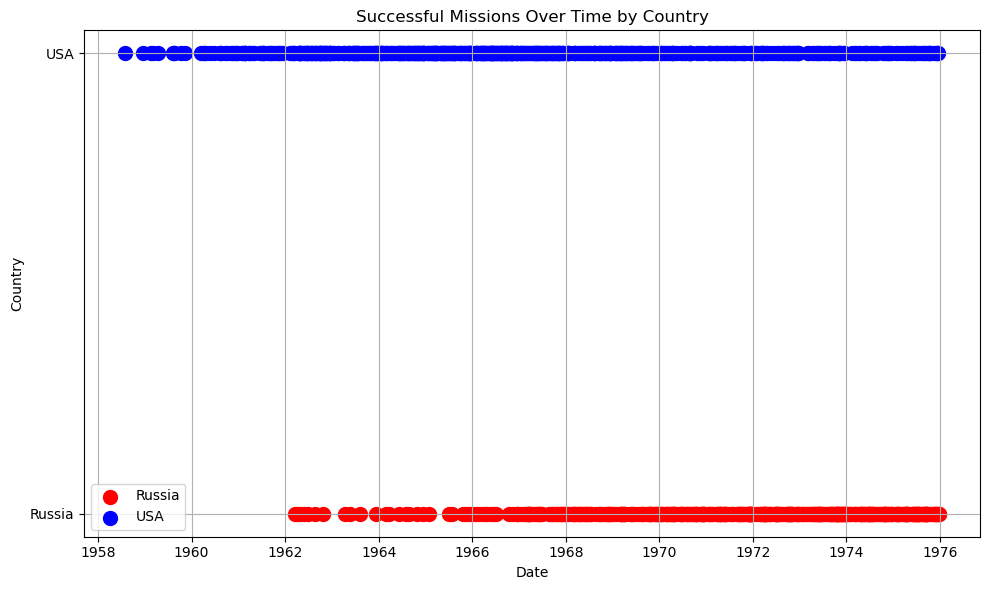

In [34]:
successful_missions = space_race[space_race['StatusMission'] == 'Success']
plt.figure(figsize=(10, 6))
for country, group in successful_missions.groupby('Country'):
    plt.scatter(group['Datum'], [country] * len(group), color=country_colors[country], label=country, marker='o', s=100)

plt.title('Successful Missions Over Time by Country')
plt.xlabel('Date')
plt.ylabel('Country')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<Axes: title={'center': 'Russia Successes'}, xlabel='Year'>

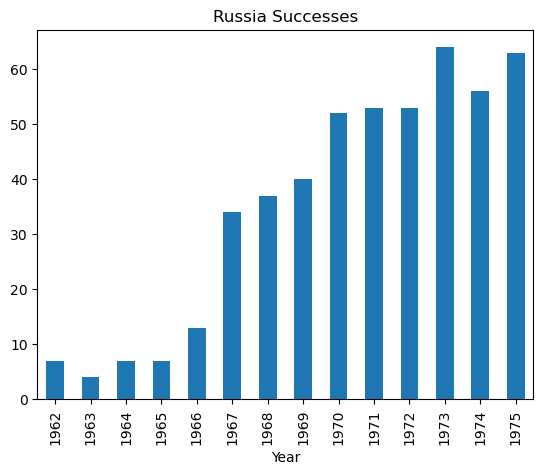

In [35]:
filterRussia = space_race['Country'] == 'Russia'
space_race[filterRussia].query('StatusMission == "Success"').groupby(['Year'], observed=False)['StatusMission'].count().plot(kind='bar', title='Russia Successes')

<Axes: title={'center': 'USA Successes'}, xlabel='Year'>

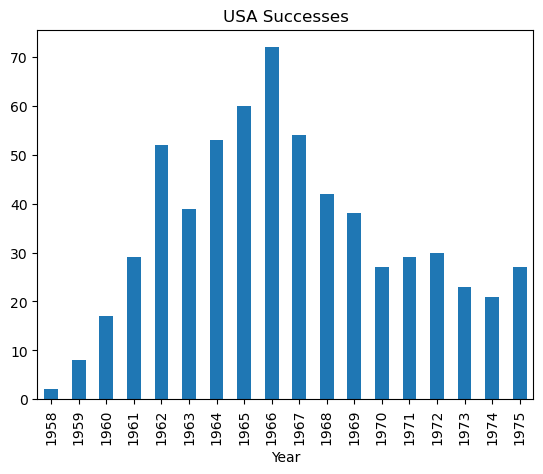

In [36]:
filterUSA = space_race['Country'] == 'USA'
space_race[filterUSA].query('StatusMission == "Success"').groupby(['Year'], observed=False)['StatusMission'].count().plot(kind='bar', title='USA Successes')

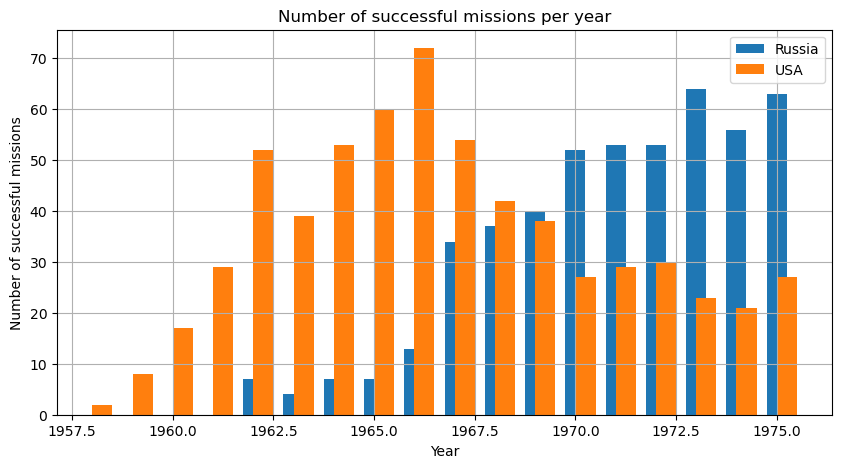

In [37]:
plt.figure(figsize=(10, 5))  # Set the size of the plot
russia = space_race[filterRussia].query('StatusMission == "Success"').groupby(['Year'], observed=False)['StatusMission'].count()
usa = space_race[filterUSA].query('StatusMission == "Success"').groupby(['Year'], observed=False)['StatusMission'].count()

# Plot each series
plt.bar(russia.index, russia.values, label='Russia', width=.5)  # You can customize the line style
plt.bar(usa.index, usa.values, label='USA', align='edge', width=.5)  # Adding another series

# Add title and labels
plt.title('Number of successful missions per year')
plt.xlabel('Year')
plt.ylabel('Number of successful missions')

# Adding a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

## Percent of successful missions

In [38]:
filter1 = space_race['Country'] == "USA"
filter2 = space_race['StatusMission'] == "Success"
x_usa = len(space_race[filter1 & filter2]) * 100
y_usa = len(space_race[filter1])
x_usa/y_usa

83.17757009345794

In [39]:
filter1 = space_race['Country'] == "Russia"
filter2 = space_race['StatusMission'] == "Success"
x_rus = len(space_race[filter1 & filter2]) * 100
y_rus = len(space_race[filter1])
x_rus/y_rus

90.4059040590406

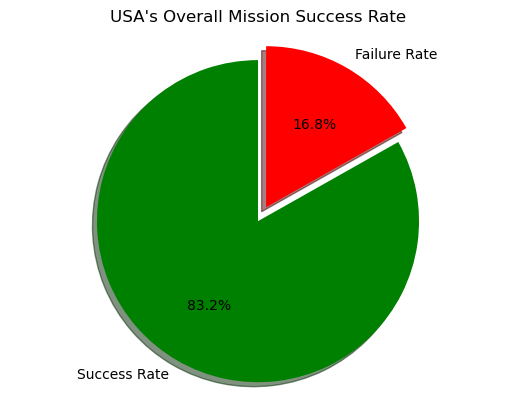

In [40]:
fig1, ax1 = plt.subplots()
ax1.pie([x_usa/y_usa, 100-x_usa/y_usa], explode=(.1, 0), labels=['Success Rate', 'Failure Rate'], colors=['green', 'red'], autopct='%1.1f%%',
        shadow=True, startangle=90)

ax1.axis('equal')  

plt.title('USA\'s Overall Mission Success Rate')
plt.show()


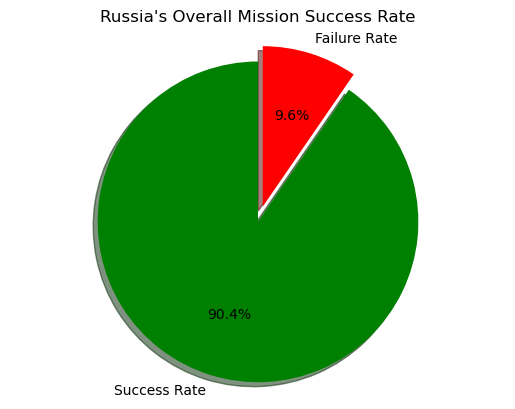

In [41]:
fig1, ax1 = plt.subplots()
ax1.pie([x_rus/y_rus, 100-x_rus/y_rus], explode=(.1, 0), labels=['Success Rate', 'Failure Rate'], colors=['green', 'red'], autopct='%1.1f%%',
        shadow=True, startangle=90)

ax1.axis('equal')  

plt.title('Russia\'s Overall Mission Success Rate')
plt.show()


In [42]:
missions_by_year = space_race.set_index(['Country', 'Year'])['StatusMission'].to_frame()

In [43]:
def get_percent(df):
    index = df.index # get indexes
    result = {} 
    for part in index:
        result[part] = {'Success': 0, 'Failure': 0} # create dict of successes and failures for each year
        for variable in df.loc[part].values: # check each value and increase proper variable
            if variable[0] == 'Success':
                result[part]['Success'] += 1
            else:
                result[part]['Failure'] += 1
    return result

In [44]:
USA_percent = get_percent(missions_by_year.loc['USA'])
Rus_percent = get_percent(missions_by_year.loc['Russia'])

In [45]:
def to_percent(data):
    for key, value in data.items():
        data[key] = value['Success'] *100 / (value['Success'] + value['Failure'])
to_percent(Rus_percent)
to_percent(USA_percent)


<Axes: title={'center': 'Success rate of Russia'}>

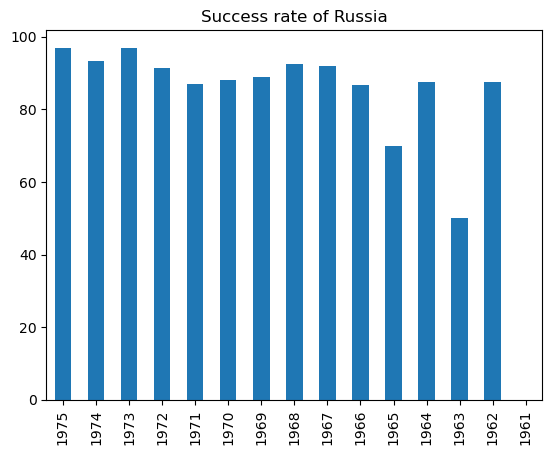

In [46]:
RSuccess = pd.DataFrame([Rus_percent], index=['SuccessRate']).transpose()
RSuccess.plot(kind='bar', title='Success rate of Russia', legend=False)

<Axes: title={'center': 'Success rate of USA'}>

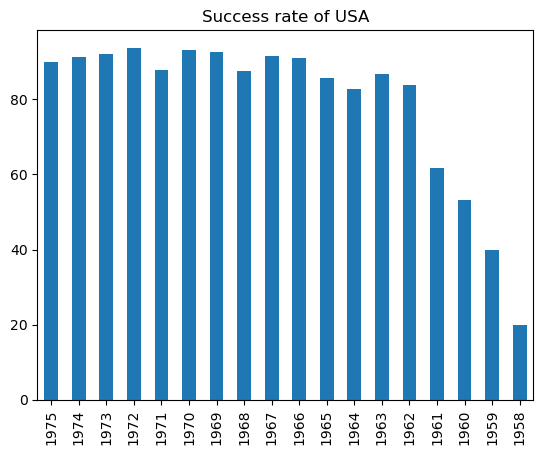

In [47]:
USuccess = pd.DataFrame([USA_percent], index=['SuccessRate']).transpose()
USuccess.plot(kind='bar', title='Success rate of USA', legend=False)

In [48]:
RSuccess.values[:, 0]

array([96.92307692, 93.33333333, 96.96969697, 91.37931034, 86.8852459 ,
       88.13559322, 88.88888889, 92.5       , 91.89189189, 86.66666667,
       70.        , 87.5       , 50.        , 87.5       ,  0.        ])

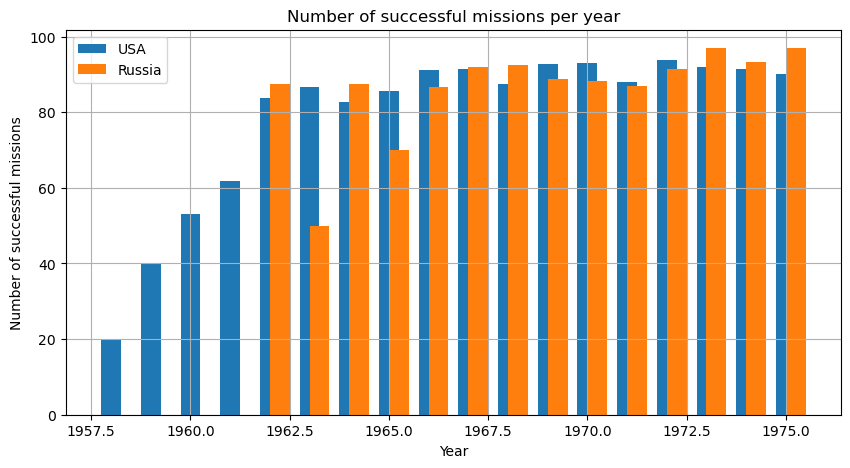

In [49]:
plt.figure(figsize=(10, 5)) 
plt.bar(USuccess.index, USuccess.values[:, 0], label='USA', width=.5)  
plt.bar(RSuccess.index, RSuccess.values[:, 0], label='Russia', align='edge', width=.5)  

plt.title('Number of successful missions per year')
plt.xlabel('Year')
plt.ylabel('Number of successful missions')

plt.legend()

plt.grid(True)
plt.show()

---

## First missions:

### USA

In [50]:
space_race.sort_values('Datum').query('Country == "Russia"').head(1)

,CompanyName,Location,Datum,Price,Rocket,StatusRocket,StatusMission,Country,Year
6621,RVSN USSR,"Mayak-2, Kapustin Yar, Russia",1961-10-27 16:30:00+00:00,NaN,DS-1 n°1,Retired,Failure,Russia,1961


### Russia

In [51]:
space_race.sort_values('Datum').query('Country == "USA"').head(1)

,CompanyName,Location,Datum,Price,Rocket,StatusRocket,StatusMission,Country,Year
6749,US Navy,"LC-18A, Cape Canaveral SFS, Florida, USA",1958-06-26 05:00:00+00:00,NaN,Vanguard SLV-2,Retired,Failure,USA,1958


## Last missions

### USA

In [52]:
space_race.sort_values('Datum').query('Country == "USA"').tail(1)

,CompanyName,Location,Datum,Price,Rocket,StatusRocket,StatusMission,Country,Year
4964,Martin Marietta,"SLC-40, Cape Canaveral SFS, Florida, USA",1975-12-14 05:15:00+00:00,NaN,DSP-5,Retired,Success,USA,1975


### Russia

In [53]:
space_race.sort_values('Datum').query('Country == "Russia"').tail(1)

,CompanyName,Location,Datum,Price,Rocket,StatusRocket,StatusMission,Country,Year
4956,RVSN USSR,"Site 43/3, Plesetsk Cosmodrome, Russia",1975-12-27 10:22:00+00:00,NaN,Molniya-3 n°56,Retired,Success,Russia,1975


## What is the gap between first missions?

In [54]:
first_mission_russia = space_race.sort_values('Datum').query('Country == "Russia"').head(1).Datum

In [55]:
first_mission_usa = space_race.sort_values('Datum').query('Country == "USA"').head(1).Datum

In [56]:
(first_mission_russia.values[0] - first_mission_usa.values[0]).astype('timedelta64[Y]').astype(int)

3

---

## How much each country had spent?
### (Data is incomplete so it will not tell us much)

In [57]:
price = space_race.groupby('Country')['Price'].sum()

Text(0, 0.5, '$million')

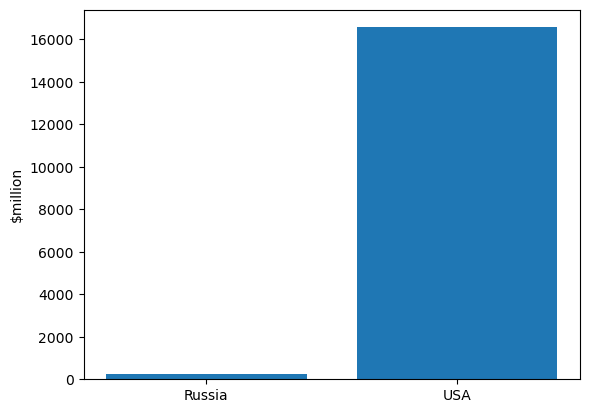

In [58]:
plt.bar(x=price.index, height=price)
plt.ylabel('$million')

## Observations on Investment Data
- **USA's Investment**: The USA documented investments exceeding 16,000 million USD.
- **Russia's Investment Data**: The data regarding Russia's investment appears somewhat incomplete, indicating investments of less than 1,000 million US.


---

## How many rockets are still active?

In [59]:
space_race.StatusRocket.value_counts()

StatusRocket
 Retired    1291
 Active        0
Name: count, dtype: int64

---

## How many rockets took part in race? Were some reused?

In [60]:
space_race['Rocket'].duplicated().any()

True

In [61]:
space_race.query('Country == "Russia"')['Rocket'].duplicated().any()

True

### Russia used same rocket twice

In [62]:
filter = space_race.query('Country == "Russia"')['Rocket'].duplicated()
space_race.query('Country == "Russia"')[filter]

,CompanyName,Location,Datum,Price,Rocket,StatusRocket,StatusMission,Country,Year
5639,RVSN USSR,"Site 132/2, Plesetsk Cosmodrome, Russia",1970-06-27 16:39:00+00:00,NaN,Strela-2M satellite,Retired,Failure,Russia,1970


### Missions of this rocket were 2 years apart

In [63]:
space_race.query('Rocket == "Strela-2M satellite"')

,CompanyName,Location,Datum,Price,Rocket,StatusRocket,StatusMission,Country,Year
5345,RVSN USSR,"Site 132/1, Plesetsk Cosmodrome, Russia",1972-10-17 19:59:00+00:00,NaN,Strela-2M satellite,Retired,Failure,Russia,1972
5639,RVSN USSR,"Site 132/2, Plesetsk Cosmodrome, Russia",1970-06-27 16:39:00+00:00,NaN,Strela-2M satellite,Retired,Failure,Russia,1970


In [64]:
space_race.query('Country == "USA"')['Rocket'].duplicated().any()

False

In [65]:
space_race.drop_duplicates(['Rocket']).groupby('Country').size()

Country
Russia    541
USA       749
dtype: int64

## The USA launched over 700 rockets, while Russia launched fewer than 600.
## This  proves that the 'Price' data is corrupted..

---

## How many companies participated in race?

<Axes: title={'center': 'Number of missions per company'}, xlabel='CompanyName'>

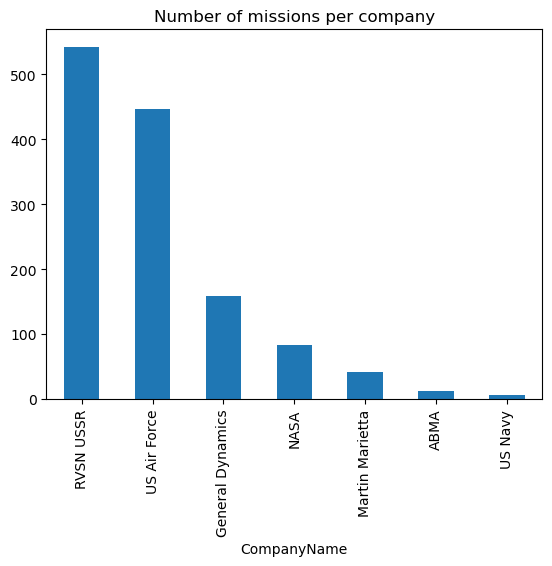

In [66]:
space_race.CompanyName.value_counts()[space_race.CompanyName.value_counts() > 0].plot(kind='bar', title='Number of missions per company')

---

## What was the best month to launch rockets into space?

In [67]:
fav_month = space_race.Datum.dt.month.value_counts().to_frame().rename({
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}, axis=0)

<Axes: title={'center': 'Number of missions per month'}, xlabel='Datum'>

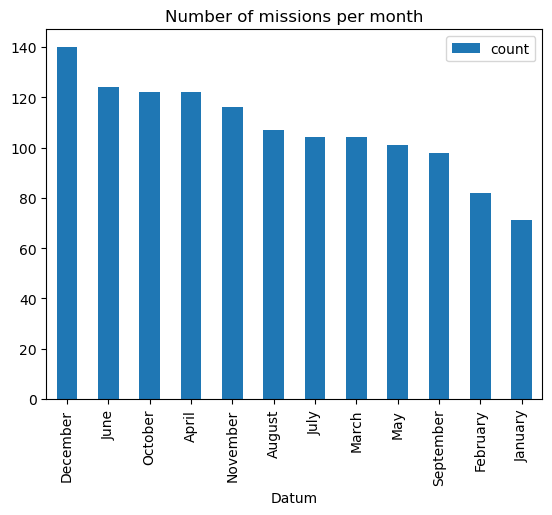

In [68]:
fav_month.plot(kind='bar', title='Number of missions per month')

In [69]:
fav_month.idxmax()

count    December
dtype: object

### Best month for space mission: *December*

---

## Observations: 
- The United States inaugurated its space program nearly four years prior to Russia, establishing an early lead.
- In response to the initial time lag, Russia accelerated its mission schedule in the second half of the space race, significantly increasing the number of launches, while the United States strategically reduced its mission frequency.
- Although the USA launched more missions overall, this higher volume correlated with a lower success rate compared to Russia.
- Throughout the duration of the space race, the failure rate of the USA showed a trend of decline, whereas Russia's failure rate remained relatively stable.

### This summary encapsulates the strategic differences and outcomes between the two nations's space programs during the competitive years of the space race.